| Problem | Formula|Search Domain|
|---      |----    |----|
|ZDT1|${\text{Min}}={\begin{cases}f_{1}\left(x\right)=x_1\\h(f_1, g)= 1-\sqrt{f1/g} \\\end{cases}} \text{   where}, g(x) = 1+ \frac{9}{n-1}\sum_{i=2}^{n}x_i$|$0\leq{x_i}\leq{1}, i=2, ...n$|
|ZDT2|${\text{Min}}={\begin{cases}f_{1}\left(x\right)=x_1\\h(f_1, g)= 1-(f1/g)^2 \\\end{cases}} \text{  where}, g(x) = 1+ \frac{9}{n-1}\sum_{i=2}^{n}x_i$|$0\leq{x_i}\leq{1}, i=2, ...n$|
|ZDT3|${\text{Min}}={\begin{cases}f_{1}\left(x\right)=x_1\\h(f_1, g)= 1-\sqrt{f1/g}-(f_1/g)sin(10\pi f_1) \\\end{cases}} \text{   where}, g(x) = 1+ \frac{9}{n-1}\sum_{i=2}^{n}x_i$|$0\leq{x_i}\leq{1}, i=2, ...n$|

# ZDT2 problem 
## - (#variables / #objectives)
## - 10/2
## - 20/2

 - `#PBS -l ncpus=4,mem=16GB`
 - `#PBS -l walltime=10:00:00`
 - `#PBS -q normal`

## Parameter list 
- do for a in nsga2 nsga3 agnomen rnsga2 `algorithm list`
- do for n_gen in 100 200 500 1000    `iterations`
- do for pop in 40 100 200            `population size`

In [11]:
import time 
from pymoo.indicators.hv import Hypervolume
from pymoo.factory import get_performance_indicator
import sys,os 
from PIL import Image               # to load images
from IPython.display import display # to display images
import pandas as pd 
import numpy as np, os ,sys 
from matplotlib import pyplot as plt 

ref_point = None
pf = None
def calculate_hv(result):
    path = os.path.join(os.path.dirname(os.getcwd()),result['path'])
    F = np.loadtxt(path)
    metric = Hypervolume(nds=True,ref_point = ref_point,norm_ref_point=False)
    igd_plus = get_performance_indicator("igd+", pf)
    start_time = time.time()
    hv = metric.do(F)
    igd_plus = igd_plus.do(F)
    exc_time = time.time() - start_time
    return [hv,igd_plus,exc_time]
def hv_result(result):
    get = result.apply(calculate_hv, axis=1)
    df = pd.DataFrame(get.tolist(), columns = ['hv','igd_plus','hv_exc_time'])
    final_result = pd.concat([result, df],axis=1)
    output_result = final_result[['Problem', 'Alg_name', 'Evaluations','Iteration', 'Objectives', 'n_variables','pop_size',
    'exec_time', 'hv','igd_plus',
    'hv_exc_time']]
    print(f'ref_point is {ref_point}')
    output_result = output_result.sort_values(['igd_plus','hv'],ascending =False).reset_index(drop=True)
    return output_result
cdir =os.getcwd()
pd.set_option('display.float_format', lambda x : "%.7f" % x)

In [12]:


pd.set_option('display.max_rows', None)
folder = os.path.dirname(os.getcwd())
filename = 'result_5NOV'
path = os.path.join(folder, filename)

result = pd.read_csv(path)


result.loc[:,'path'] = result['path'].str[29:].values
result.loc[:,'image_location'] = result['image_location'].str[29:].values
result.loc[:,'approx_nadir'] = result['approx_nadir'].str[1:-1].values
result = result.drop(columns=['xl','xu'])
result = result.loc[result['Problem']=='ZDT2'].reset_index(drop=True)
zdt2_10= result.loc[result['n_variables']==10].reset_index(drop=True)
zdt2_20= result.loc[result['n_variables']==20].reset_index(drop=True)
print(f"The number of records {len(zdt2_10)}")
print(f"The number of records {len(zdt2_20)}")

The number of records 56
The number of records 56


# zdt2 with 10 variables

In [13]:
#path and image path indicating location of objective file and visualization file
zdt2_10.iloc[:,-2:].head(5)

,path,image_location
0,ZDT2/NSGA2_ZDT2_10/ZDT2_NSGA2_Iteration-100_Ob...,Images/ZDT2/NSGA2_ZDT2Var-10/ZDT2_NSGA2_Iterat...
1,ZDT2/NSGA2_ZDT2_10/ZDT2_NSGA2_Iteration-200_Ob...,Images/ZDT2/NSGA2_ZDT2Var-10/ZDT2_NSGA2_Iterat...
2,ZDT2/NSGA2_ZDT2_10/ZDT2_NSGA2_Iteration-100_Ob...,Images/ZDT2/NSGA2_ZDT2Var-10/ZDT2_NSGA2_Iterat...
3,ZDT2/NSGA2_ZDT2_10/ZDT2_NSGA2_Iteration-500_Ob...,Images/ZDT2/NSGA2_ZDT2Var-10/ZDT2_NSGA2_Iterat...
4,ZDT2/AGNOMEN_ZDT2_10/ZDT2_AGNOMEN_Iteration-10...,Images/ZDT2/AGNOMEN_ZDT2Var-10/ZDT2_AGNOMEN_It...


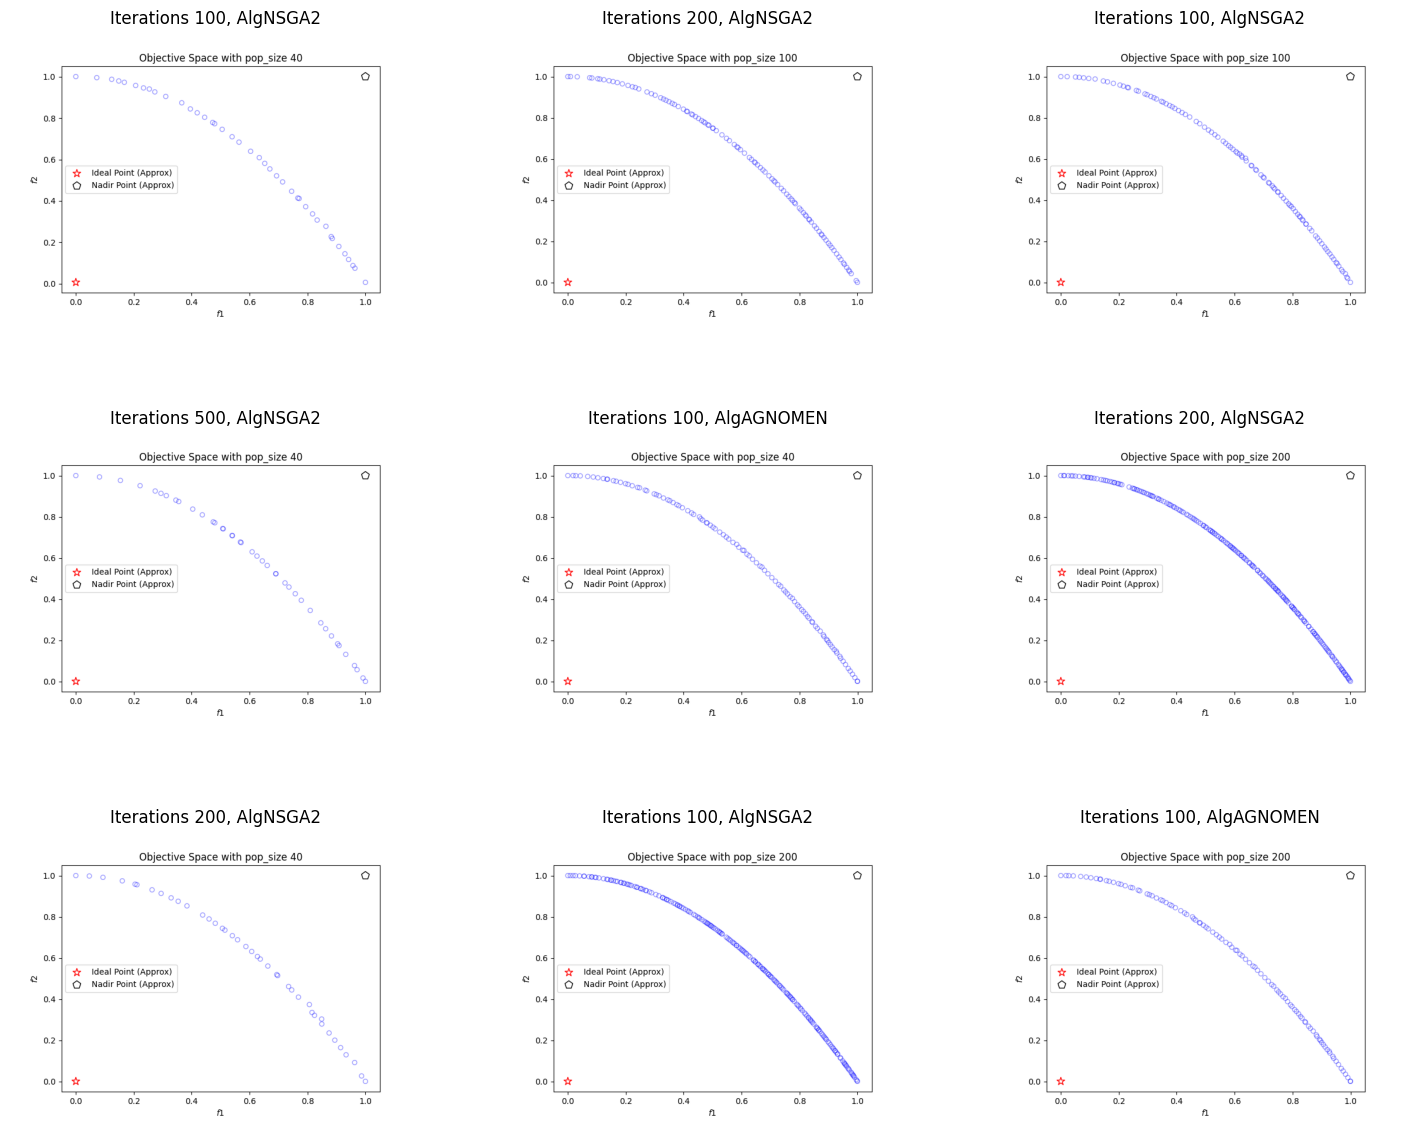

In [14]:
# more figures can be found here: Result/Images/KUR1/..
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots(figsize=(18,15), dpi=100)
for i in range(9):
    plt.subplot(3,3,i+1)
    f = zdt2_10['image_location'][i]
    path = os.path.join(folder,f )+'.png'
    img = Image.open(path)
    plt.title(f'Iterations {zdt2_10.Iteration[i]}, Alg{zdt2_10.Alg_name[i]}')
    plt.axis('off')
    plt.imshow(img)

In [15]:
nadir_arr  = np.array([np.fromstring(i, dtype=float, sep=' ') for i in np.array(zdt2_10['approx_nadir'])])

print(f'Global nadir point for kur1 with two variables is :{np.round(np.max(nadir_arr, axis=0),2)}')

ref_point = np.array([1 ,1])
pf = np.loadtxt(os.path.join(cdir, 'Bench/zdt2_10_pf' ))
hv_result(zdt2_10)

Global nadir point for kur1 with two variables is :[1.   1.16]
ref_point is [1 1]


,Problem,Alg_name,Evaluations,Iteration,Objectives,n_variables,pop_size,exec_time,hv,igd_plus,hv_exc_time
0,ZDT2,NSGA3,4000,100,2,10,40,0.4649889,0.1400365,0.2544199,0.0008523
1,ZDT2,NSGA3,8000,200,2,10,40,0.9586239,0.1974880,0.1826786,0.0007589
2,ZDT2,NSGA3,10000,100,2,10,100,0.9945788,0.2970644,0.0519510,0.0017328
3,ZDT2,NSGA3,40000,1000,2,10,40,5.1793621,0.3068773,0.0171540,0.0008342
4,ZDT2,NSGA3,20000,500,2,10,40,2.5789931,0.3011046,0.0169920,0.0009620
5,ZDT2,RNSGA2,8000,200,2,10,40,1.7641065,0.3181024,0.0120881,0.0009379
6,ZDT2,RNSGA2,4000,100,2,10,40,0.8127680,0.3123837,0.0102370,0.0009389
7,ZDT2,RNSGA2,20000,500,2,10,40,4.2773507,0.3118857,0.0094968,0.0006723
8,ZDT2,RNSGA2,40000,1000,2,10,40,8.6052434,0.3132214,0.0093659,0.0007250
9,ZDT2,NSGA2,4000,100,2,10,40,0.4835570,0.3173224,0.0077755,0.0007699


In [16]:
ref_point = np.array([5,5])
pf = np.loadtxt(os.path.join(cdir, 'Bench/zdt2_10_pf' ))
hv_result(zdt2_10)

ref_point is [5 5]


,Problem,Alg_name,Evaluations,Iteration,Objectives,n_variables,pop_size,exec_time,hv,igd_plus,hv_exc_time
0,ZDT2,NSGA3,4000,100,2,10,40,0.4649889,20.9576753,0.2544199,0.0007591
1,ZDT2,NSGA3,8000,200,2,10,40,0.9586239,21.5245524,0.1826786,0.0007622
2,ZDT2,NSGA3,10000,100,2,10,100,0.9945788,22.8052376,0.0519510,0.0016992
3,ZDT2,NSGA3,40000,1000,2,10,40,5.1793621,23.6796347,0.0171540,0.0009031
4,ZDT2,NSGA3,20000,500,2,10,40,2.5789931,23.8853867,0.0169920,0.0008671
5,ZDT2,RNSGA2,8000,200,2,10,40,1.7641065,23.7846946,0.0120881,0.0006931
6,ZDT2,RNSGA2,4000,100,2,10,40,0.8127680,24.1754546,0.0102370,0.0007548
7,ZDT2,RNSGA2,20000,500,2,10,40,4.2773507,24.2415947,0.0094968,0.0007660
8,ZDT2,RNSGA2,40000,1000,2,10,40,8.6052434,24.2545516,0.0093659,0.0007272
9,ZDT2,NSGA2,4000,100,2,10,40,0.4835570,24.2942389,0.0077755,0.0008411


# zdt2 with 20 variables

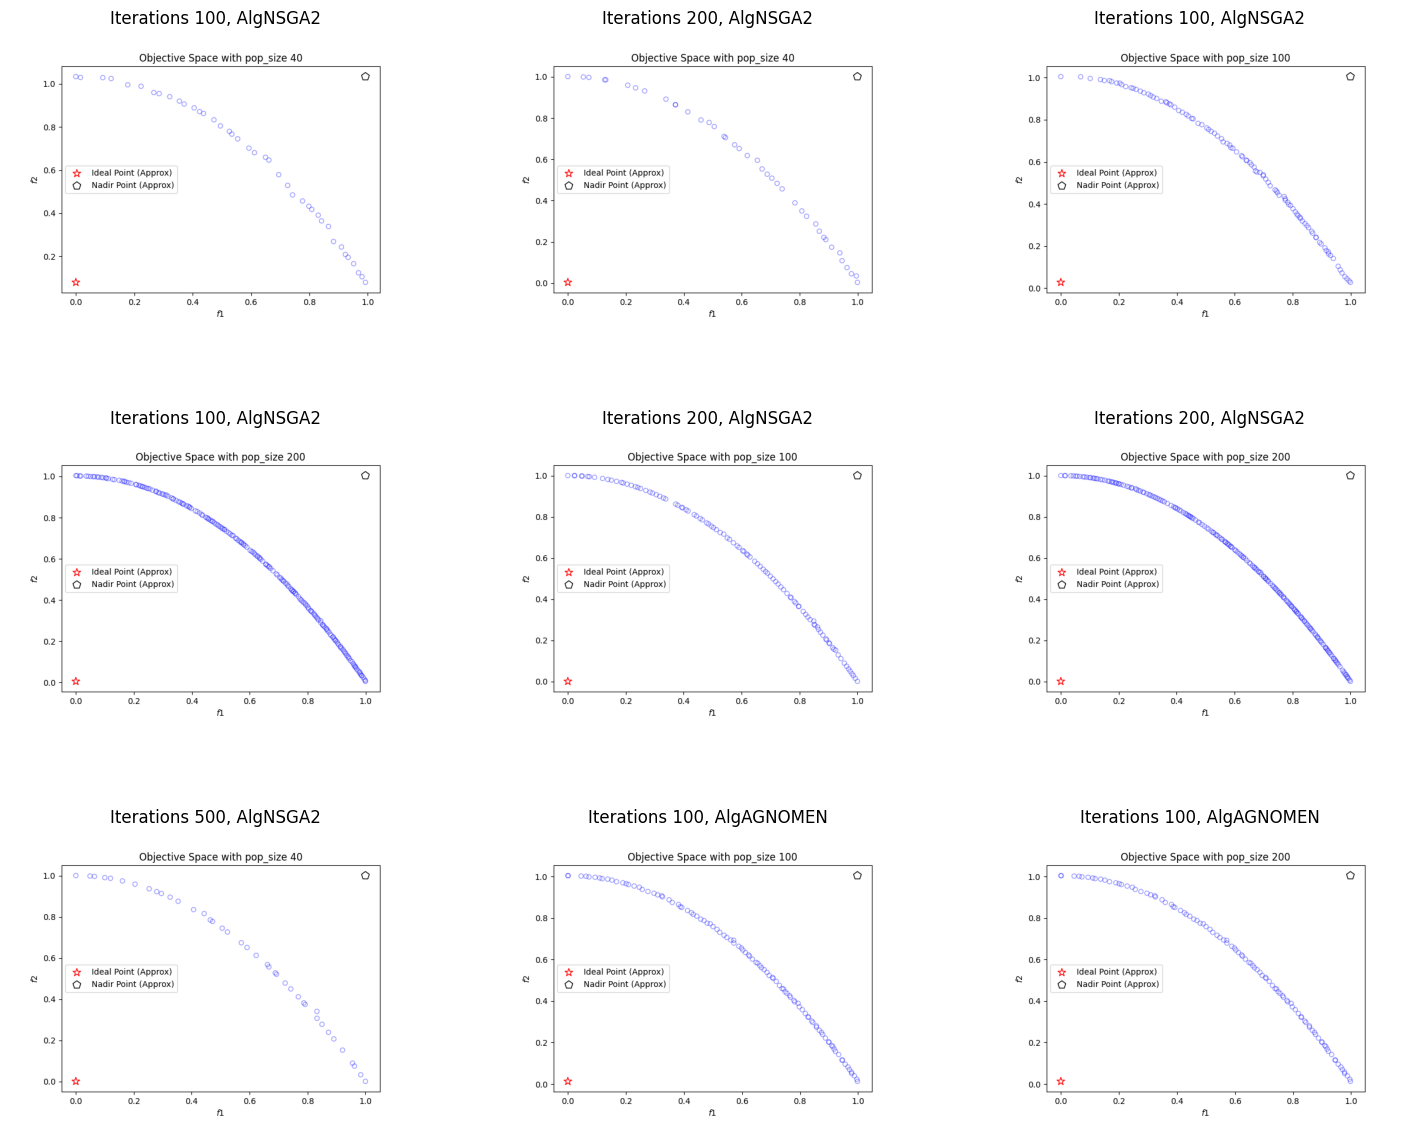

In [17]:
# more figures can be found here: Result/Images/KUR1/..
%matplotlib inline
import matplotlib.pyplot as plt
plt.subplots(figsize=(18,15), dpi=100)
for i in range(9):
    plt.subplot(3,3,i+1)
    f = zdt2_20['image_location'][i]
    path = os.path.join(folder,f )+'.png'
    img = Image.open(path)
    plt.title(f'Iterations {zdt2_20.Iteration[i]}, Alg{zdt2_20.Alg_name[i]}')
    plt.axis('off')
    plt.imshow(img)

In [18]:
nadir_arr  = np.array([np.fromstring(i, dtype=float, sep=' ') for i in np.array(zdt2_20['approx_nadir'])])

print(f'Global nadir point for kur1 with two variables is :{np.round(np.max(nadir_arr, axis=0),2)}')

ref_point = np.array([1  ,1])
pf = np.loadtxt(os.path.join(cdir, 'Bench/zdt2_20_pf' ))
hv_result(zdt2_20)

Global nadir point for kur1 with two variables is :[1.   1.04]
ref_point is [1 1]


,Problem,Alg_name,Evaluations,Iteration,Objectives,n_variables,pop_size,exec_time,hv,igd_plus,hv_exc_time
0,ZDT2,NSGA3,20000,500,2,20,40,2.5799518,0.2430918,0.1443520,0.0009139
1,ZDT2,NSGA3,4000,100,2,20,40,0.5124431,0.2534768,0.0771451,0.0008171
2,ZDT2,NSGA3,10000,100,2,20,100,1.0371931,0.2791346,0.0718665,0.0016940
3,ZDT2,NSGA3,8000,200,2,20,40,0.9839730,0.2787268,0.0374708,0.0007999
4,ZDT2,NSGA2,4000,100,2,20,40,0.4963908,0.2751333,0.0369003,0.0007429
5,ZDT2,NSGA3,40000,1000,2,20,40,5.5415728,0.3051574,0.0275405,0.0009511
6,ZDT2,RNSGA2,40000,1000,2,20,40,8.5242610,0.3065590,0.0150068,0.0006747
7,ZDT2,NSGA3,20000,200,2,20,100,2.0522151,0.3194200,0.0147460,0.0018060
8,ZDT2,RNSGA2,4000,100,2,20,40,0.8339732,0.3110807,0.0113504,0.0008240
9,ZDT2,NSGA2,10000,100,2,20,100,0.9452631,0.3152132,0.0101714,0.0015531


In [19]:


ref_point = np.array([5 ,5])
pf = np.loadtxt(os.path.join(cdir, 'Bench/zdt2_20_pf' ))
hv_result(zdt2_20)

ref_point is [5 5]


,Problem,Alg_name,Evaluations,Iteration,Objectives,n_variables,pop_size,exec_time,hv,igd_plus,hv_exc_time
0,ZDT2,NSGA3,20000,500,2,20,40,2.5799518,21.7253644,0.1443520,0.0015180
1,ZDT2,NSGA3,4000,100,2,20,40,0.5124431,22.9176242,0.0771451,0.0007460
2,ZDT2,NSGA3,10000,100,2,20,100,1.0371931,22.6234875,0.0718665,0.0017140
3,ZDT2,NSGA3,8000,200,2,20,40,0.9839730,23.3111029,0.0374708,0.0010068
4,ZDT2,NSGA2,4000,100,2,20,40,0.4963908,23.9517400,0.0369003,0.0009232
5,ZDT2,NSGA3,40000,1000,2,20,40,5.5415728,23.3791630,0.0275405,0.0007441
6,ZDT2,RNSGA2,40000,1000,2,20,40,8.5242610,23.9088069,0.0150068,0.0006542
7,ZDT2,NSGA3,20000,200,2,20,100,2.0522151,23.4066560,0.0147460,0.0018532
8,ZDT2,RNSGA2,4000,100,2,20,40,0.8339732,24.1569691,0.0113504,0.0007222
9,ZDT2,NSGA2,10000,100,2,20,100,0.9452631,24.2043521,0.0101714,0.0018010
